In [1]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
import peakutils

In [2]:
! pip install peakutils

In [30]:
R1, R2 = 0.5, 0.5
L1, L2 = 200e-6, 200e-6
C1, C2 = 1e-7, 1e-7
Rc = 400

#teorica
wres = 1/((L1*C1)**.5)
fres = wres/(2*pi)

Uf = 5
fres

35588.127170858854

In [5]:
def calcular_transformador(Uf, Rc, XL, XC, XM, Zeq):
    Z = np.array([[R1+XL+XC,- XM], [-XM, XL+R2+Zeq]])
    V = np.array([Uf,0])
    I = np.dot(linalg.inv(Z),V)
    return I[0], I[1]

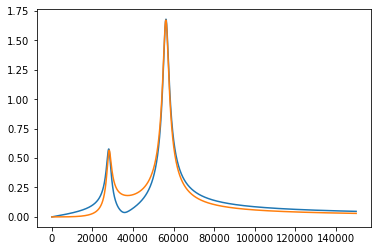

In [68]:
lista_f = np.linspace(1, 150000, 10000)
lista_k = np.arange(0.1, 0.95, 0.1)

k = 0.6

correntes1 = []
correntes2 = []

for f in lista_f:
    w = 2*pi*f
    XL = 1j*w*L1
    XC = 1/(1j*w*C1)
    XM = (k*((L1*L2)**.5))*1j*w
    Zeq = (XC*Rc)/(XC+Rc)

    i1, i2 = calcular_transformador(Uf, Rc, XL, XC, XM, Zeq)

    correntes1.append(abs(i1))
    correntes2.append(abs(i2))

plt.plot(lista_f, correntes1)
plt.plot(lista_f, correntes2)
plt.show()

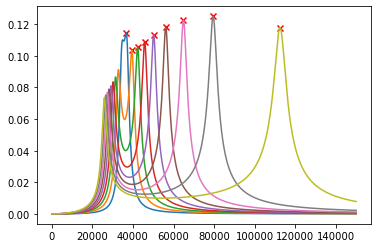

In [64]:
lista_f = np.linspace(1, 150000, 10000)
lista_k = np.arange(0.1, 0.95, 0.1)

lista_picosx = []
lista_picosy = []

for k in lista_k:
    correntes1 = []
    correntes2 = []
    correntes_carga = []
    for f in lista_f:
        w = 2*pi*f
        XL = 1j*w*L1
        XC = 1/(1j*w*C1)
        XM = (k*((L1*L2)**.5))*1j*w
        Zeq = (XC*Rc)/(XC+Rc)

        i1, i2 = calcular_transformador(Uf, Rc, XL, XC, XM, Zeq)

        correntes1.append(i1.real)
        correntes2.append(i2.real)
        ic = Zeq*i2/Rc
        correntes_carga.append(abs(ic))
        

    picos = peakutils.indexes(correntes_carga, thres=0.98, min_dist=1)

    lista_picosx.append(lista_f[picos[0]])
    lista_picosy.append(correntes_carga[picos[0]])
#     print(f'Picos para k={k}, {lista_f[picos[0]]}')
#     plt.plot(lista_f, correntes1)
#     plt.show()
#     plt.plot(lista_f, correntes2)
#     plt.show()
    plt.plot(lista_f, correntes_carga)
    
plt.scatter(lista_picosx, lista_picosy, color='red', marker='x')
plt.show()
# print(lista_picosx)

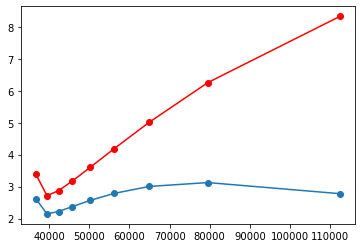

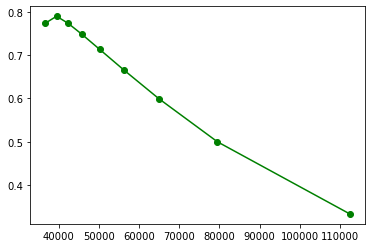

In [60]:
lista_k = np.arange(0.1, 0.95, 0.1)
potencias_entrada = []
potencias_saida = []
rendimentos = []

for k, f in zip(lista_k, lista_picosx):
    w = 2*pi*f
    XL = 1j*w*L1
    XC = 1/(1j*w*C1)
    XM = (k*((L1*L2)**.5))*1j*w
    Zeq = (XC*Rc)/(XC+Rc)

    i1, i2 = calcular_transformador(Uf, Rc, XL, XC, XM, Zeq)

    ic = Zeq*i2/Rc
    
    P1ef = (Uf * i1.conjugate())/2
    P1_real = P1ef.real
    potencias_entrada.append(P1_real)
    
    V2 = ic*Rc
    P2ef = (V2*ic.conjugate())/2
    P2_real = P2ef.real
    potencias_saida.append(P2_real)
    rendimento = P2_real/P1_real
    rendimentos.append(rendimento)
    # print(f'Picos para k={k}, {lista_f[picos[0]]}')
    # plt.plot(lista_f, correntes1)
    # plt.show()
    # plt.plot(lista_f, correntes2)
    # plt.show()
    
plt.plot(lista_picosx, potencias_entrada, 'r-o')
plt.plot(lista_picosx, potencias_saida, '-o')
plt.show()
plt.plot(lista_picosx, rendimentos, 'g-o')
plt.show()
# print(potencias_entrada)
# print(potencias_saida)

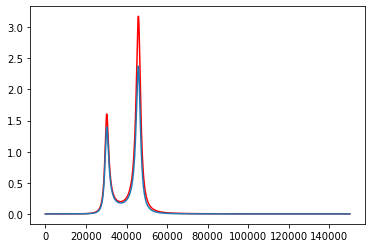

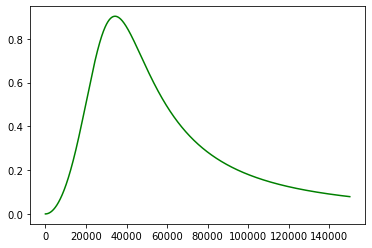

In [74]:
lista_f = np.linspace(1, 150000, 10000)
k = 0.4

potencias_entrada = []
potencias_saida = []
rendimentos = []

for f in lista_f:
    w = 2*pi*f
    XL = 1j*w*L1
    XC = 1/(1j*w*C1)
    XM = (k*((L1*L2)**.5))*1j*w
    Zeq = (XC*Rc)/(XC+Rc)

    i1, i2 = calcular_transformador(Uf, Rc, XL, XC, XM, Zeq)

    ic = Zeq*i2/Rc
    
    P1ef = (Uf * i1.conjugate())/2
    P1_real = P1ef.real
    potencias_entrada.append(P1_real)
    
    V2 = ic*Rc
    P2ef = (V2*ic.conjugate())/2
    P2_real = P2ef.real
    potencias_saida.append(P2_real)
    rendimento = P2_real/P1_real
    rendimentos.append(rendimento)
    
plt.plot(lista_f, potencias_entrada, color='red')
plt.plot(lista_f, potencias_saida)
plt.show()
plt.plot(lista_f, rendimentos, color='green')
plt.show()


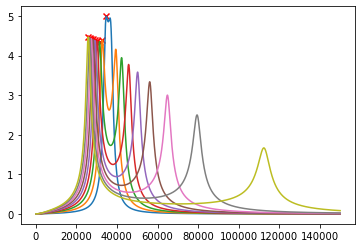

In [76]:
lista_f = np.linspace(1, 150000, 10000)
lista_k = np.arange(0.1, 0.95, 0.1)

lista_picosx = []
lista_picosy = []

for k in lista_k:
    tensao_carga = []
    for f in lista_f:
        w = 2*pi*f
        XL = 1j*w*L1
        XC = 1/(1j*w*C1)
        XM = (k*((L1*L2)**.5))*1j*w
        Zeq = (XC*Rc)/(XC+Rc)

        i1, i2 = calcular_transformador(Uf, Rc, XL, XC, XM, Zeq)
        
        ic = Zeq*i2/Rc
        Vc = ic*Zeq
        tensao_carga.append(abs(Vc))
        
        
    picos = peakutils.indexes(tensao_carga, thres=0.95, min_dist=1)
    lista_picosx.append(lista_f[picos[0]])
    lista_picosy.append(tensao_carga[picos[0]])
    # print(f'Picos para k={k}, {lista_f[picos[0]]}')
    # plt.plot(lista_f, correntes1)
    # plt.show()
    # plt.plot(lista_f, correntes2)
    # plt.show()
    plt.plot(lista_f, tensao_carga)
    
plt.scatter(lista_picosx, lista_picosy, color='red', marker='x')
plt.show()